<h1 style = "color: orange"> Computer Networks CA#2</h1>

<h2 style = "color: DeepSkyBlue"> Moein Karami 810198540 </h2>
<h2 style = "color: DeepSkyBlue"> Aryan Soltani 810198558 </h2>



In [99]:
import os 
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
NAME_TCL_FILE = "wireless.tcl"
ERROR_RATE_FILE = "output_with_error_rate_"
BAND_WIDTH_FILE = "output_with_bandwidth_"
BAND_WIDTH_DEFAULT = 1.5
BANDWIDTH_LIST = [1.5, 55, 155]
ERROR_RATE_DEFAULT = 0.00001

In [101]:
def input_values_tcl(error_rate, bandwidth, file_name):
    command_string = "ns " + NAME_TCL_FILE + " " + str(error_rate) + " " + str(bandwidth) + " " + file_name + " " + "1000"
    os.system(command_string)


In [102]:
def simulate_all(files, percentage):
    inc = percentage
    now = inc
    while(now <= percentage * 10):
        file_name = ERROR_RATE_FILE + str(now)
        files.append([file_name, now, BAND_WIDTH_DEFAULT])
        input_values_tcl(now, BAND_WIDTH_DEFAULT, file_name)
        now += inc
    for bandwidth in BANDWIDTH_LIST:
        file_name = BAND_WIDTH_FILE + str(bandwidth) + "Mb"
        files.append([file_name, ERROR_RATE_DEFAULT, bandwidth])
        input_values_tcl(ERROR_RATE_DEFAULT, bandwidth, file_name)


In [103]:
def parse(type_command, vec):
    for i in range(len(vec)):
        if(vec[i] == type_command):
            return vec[i + 1]

In [104]:
def throughputs_for_one(file_now, throughputs):
    file_name = "output/" + file_now[0] + ".tr"
    duration = 100
    error_rate = file_now[1]
    bandwidth = file_now[2]
    total_number_bits = 0
    time_bits = [0 for i in range(100)]
    trace = open(file_name).readlines()
    for line in trace:
        vec = line.split()
        event = vec[0]
        node_id = parse("-Hs", vec)
        size_packet = parse("-Il", vec)
        time_now = float(parse("-t", vec))
        if(size_packet == None):
            size_packet = 0
        if(event == "r" and (node_id == "7" or node_id == "8")):
            total_number_bits += int(size_packet) * 8
            time_bits[int(time_now)] += int(size_packet) * 8
    plt.plot(range(0,100), time_bits)
    plt.xlabel("Time(s)")
    plt.ylabel("Throughputs(bit)")
    plt.title("Throughputs per Second Diagram")
    plt.show()
    th_put = total_number_bits / (duration * (1024 * 1024))
    throughputs.append(th_put)
    print("For error rate: ", error_rate, " and bandwidth: ", bandwidth, sep = ' ')
    print("Throughput is: ", th_put, sep = ' ')

In [131]:
def calculate_throughputs(files, percentage):
    throughputs = []
    for file_now in files:
        throughputs_for_one(file_now, throughputs)
    inc = percentage
    now = inc
    arr_x = []
    out_thr = []
    cnt = 0
    while(now <= percentage * 10):
        arr_x.append(now)
        out_thr.append(throughputs[cnt])
        now += inc
        cnt+=1
        
    if(percentage == -1):
        plt.plot(range(1000, 10000, 1000), throughputs)
        plt.xlabel("Packet Size")
        plt.ylabel("Throughputs")
        plt.show()
    else:
        plt.plot(arr_x, out_thr)
        plt.show()

In [106]:
def calculate_packet_for_one(file_now, packet_tr):
    file_name = "output/" + file_now[0] + ".tr"
    duration = 100
    error_rate = file_now[1]
    bandwidth = file_now[2]
    total_packets = 0
    recieved_packets = 0
    trace = open(file_name).readlines()
    for line in trace:
        vec = line.split()
        event = vec[0]
        node_id = parse("-Hs", vec)
        if(event == "r" and node_id == "0" or node_id == "3"):
            total_packets += 1
        if(event == "r" and (node_id == "7" or node_id == "8")):
            recieved_packets += 1
        
    ratio_packet_r = recieved_packets / total_packets
    packet_tr.append(ratio_packet_r)
    print("For error rate: ", error_rate, " and bandwidth: ", bandwidth, sep = ' ')
    print("Packet transfer ratio is: ", ratio_packet_r, sep = ' ')

In [107]:
def calculate_packet_transfer_ratio(files):
    packet_tr = []
    for file_now in files:
        calculate_packet_for_one(file_now, packet_tr)


In [108]:
def calculate_average_for_one(file_now, time_delay):
    start = [0 for i in range(100000)]
    cnt_reach = 0
    time_all = 0
    file_name = "output/" + file_now[0] + ".tr"
    duration = 100
    error_rate = file_now[1]
    bandwidth = file_now[2]
    trace = open(file_name).readlines()
    time_vec = [0 for i in range(100)]
    for line in trace:
        vec = line.split()
        event = vec[0]
        node_id = parse("-Hs", vec)
        packet_id = parse("-Ii", vec)
        if(packet_id != None):
            packet_id = int(packet_id)
        else:
            continue
        time_send = parse("-t", vec)
        if(event == "r" and node_id == "0" or node_id == "3"):
            start[packet_id] = time_send
        if(event == "r" and (node_id == "7" or node_id == "8")):
            cnt_reach += 1
            time_all += float(time_send)
            time_all -= float(start[packet_id])
            time_vec[int(float(time_send))] += float(time_send)
            time_vec[int(float(time_send))] -= float(start[packet_id])
    time_vec[0] = 0
    for i in range(1, 100):
        time_vec[i] /= i
    plt.plot(range(0, 100), time_vec)
    plt.xlabel("Time(s)")
    plt.ylabel("Average end to end")
    plt.show()
    if(cnt_reach != 0):
        delay_all = time_all / (cnt_reach * 1000)
    else:
        delay_all = 0
    time_delay.append(delay_all)
    print("For error rate: ", error_rate, " and bandwidth: ", bandwidth, sep = ' ')
    print("Packet average delay is: ", delay_all, " second", sep = ' ')

In [109]:
def calculate_average_end(files):
    time_delay = []
    for file_now in files:
        calculate_average_for_one(file_now, time_delay)

In [110]:
files = []
simulate_all(files, 0.00001)

Simulation with: 
Error Rate : 1e-05
Bandwidth : 1.5
Packet Size : 1000


INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
Simulation with: 
Error Rate : 2e-05
Bandwidth : 1.5
Packet Size : 1000


INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
Simulation with: 
Error Rate : 3.0000000000000004e-05
Bandwidth : 1.5
Packet Size : 1000


INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
Simulation with: 
Error Rate : 4e-05
Bandwidth : 1.5
Packet Size : 1000


INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
Simulation with: 
Error Rate : 5e-05
Bandwidth : 1.5
Packet Size : 1000


INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
Simulation with: 
Error Rate : 6e-05
Bandwidth : 1.5
Packet Size : 1000


INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
Simulation with: 
Error Rate : 7.000000000000001e-05
Bandwidth : 1.5
Packet Size : 1000


INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
Simulation with: 
Error Rate : 8e-05
Bandwidth : 1.5
Packet Size : 1000


INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
Simulation with: 
Error Rate : 9e-05
Bandwidth : 1.5
Packet Size : 1000


INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
Simulation with: 
Error Rate : 0.0001
Bandwidth : 1.5
Packet Size : 1000


INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
Simulation with: 
Error Rate : 1e-05
Bandwidth : 1.5
Packet Size : 1000


INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
Simulation with: 
Error Rate : 1e-05
Bandwidth : 55
Packet Size : 1000


INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
Simulation with: 
Error Rate : 1e-05
Bandwidth : 155
Packet Size : 1000


INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0


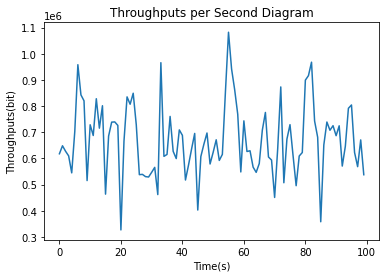

For error rate:  1e-05  and bandwidth:  1.5
Throughput is:  0.639278564453125


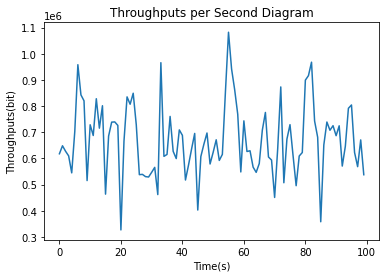

For error rate:  2e-05  and bandwidth:  1.5
Throughput is:  0.639278564453125


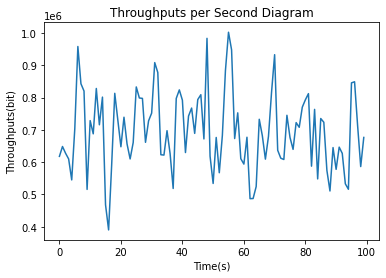

For error rate:  3.0000000000000004e-05  and bandwidth:  1.5
Throughput is:  0.6623626708984375


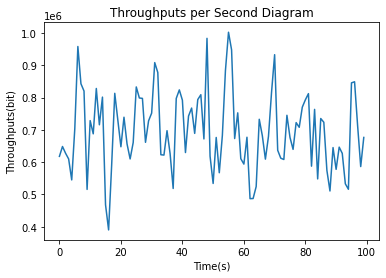

For error rate:  4e-05  and bandwidth:  1.5
Throughput is:  0.6623626708984375


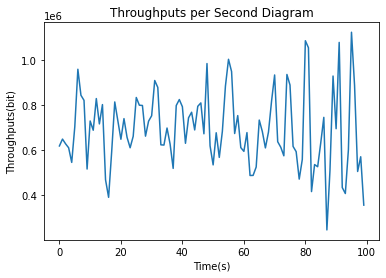

For error rate:  5e-05  and bandwidth:  1.5
Throughput is:  0.660731201171875


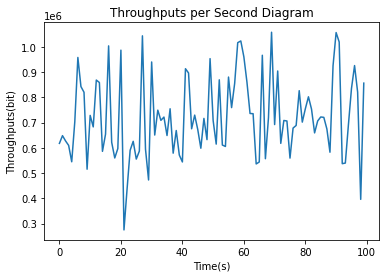

For error rate:  6e-05  and bandwidth:  1.5
Throughput is:  0.688919677734375


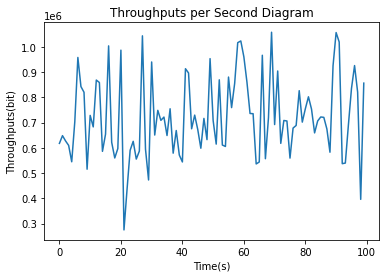

For error rate:  7.000000000000001e-05  and bandwidth:  1.5
Throughput is:  0.688912353515625


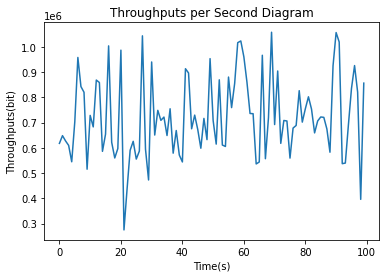

For error rate:  8e-05  and bandwidth:  1.5
Throughput is:  0.688912353515625


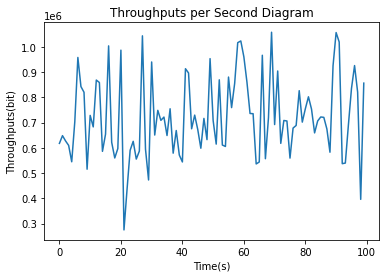

For error rate:  9e-05  and bandwidth:  1.5
Throughput is:  0.688912353515625


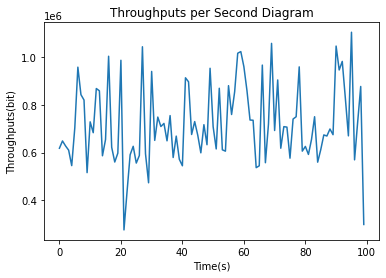

For error rate:  0.0001  and bandwidth:  1.5
Throughput is:  0.686546630859375


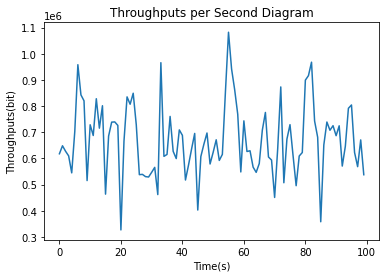

For error rate:  1e-05  and bandwidth:  1.5
Throughput is:  0.639278564453125


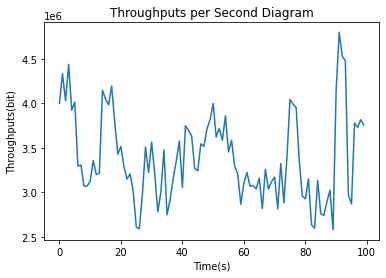

For error rate:  1e-05  and bandwidth:  55
Throughput is:  3.236051025390625


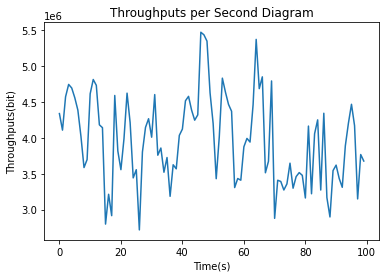

For error rate:  1e-05  and bandwidth:  155
Throughput is:  3.7802777099609375


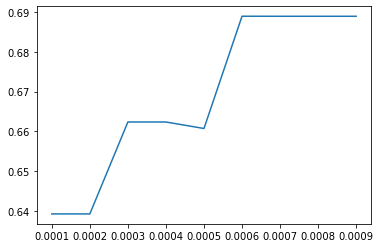

In [111]:
calculate_throughputs(files, 0.0001)

As we can see in the diagrams number of throuputs per second is not consistent and it is changing constantly by the time.

In [112]:
calculate_packet_transfer_ratio(files)

For error rate:  1e-05  and bandwidth:  1.5
Packet transfer ratio is:  0.888731521642914
For error rate:  2e-05  and bandwidth:  1.5
Packet transfer ratio is:  0.888731521642914
For error rate:  3.0000000000000004e-05  and bandwidth:  1.5
Packet transfer ratio is:  0.8297266971227057
For error rate:  4e-05  and bandwidth:  1.5
Packet transfer ratio is:  0.8297266971227057
For error rate:  5e-05  and bandwidth:  1.5
Packet transfer ratio is:  0.8646906137486394
For error rate:  6e-05  and bandwidth:  1.5
Packet transfer ratio is:  0.9729144574054436
For error rate:  7.000000000000001e-05  and bandwidth:  1.5
Packet transfer ratio is:  0.9728260869565217
For error rate:  8e-05  and bandwidth:  1.5
Packet transfer ratio is:  0.9728260869565217
For error rate:  9e-05  and bandwidth:  1.5
Packet transfer ratio is:  0.9728260869565217
For error rate:  0.0001  and bandwidth:  1.5
Packet transfer ratio is:  1.041224858542152
For error rate:  1e-05  and bandwidth:  1.5
Packet transfer ratio is:

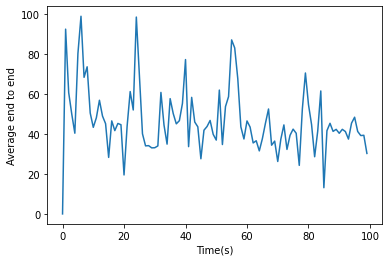

For error rate:  1e-05  and bandwidth:  1.5
Packet average delay is:  0.013165785806321592  second


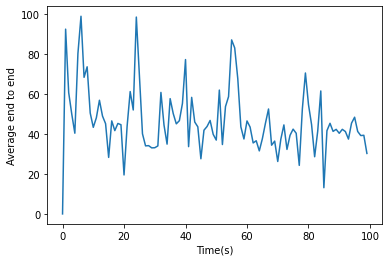

For error rate:  2e-05  and bandwidth:  1.5
Packet average delay is:  0.013165785806321592  second


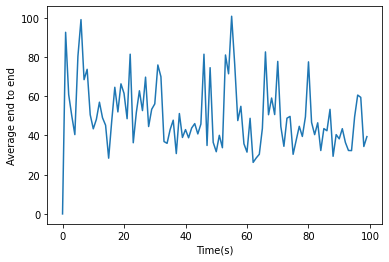

For error rate:  3.0000000000000004e-05  and bandwidth:  1.5
Packet average delay is:  0.01385179880218793  second


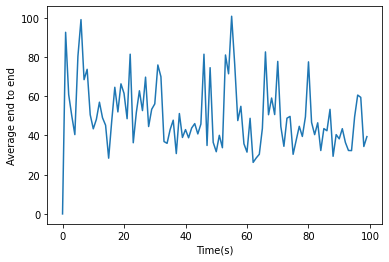

For error rate:  4e-05  and bandwidth:  1.5
Packet average delay is:  0.01385179880218793  second


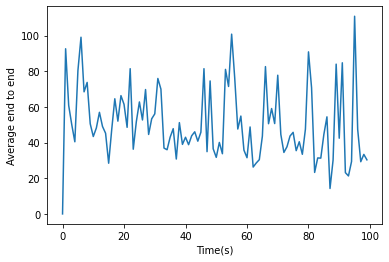

For error rate:  5e-05  and bandwidth:  1.5
Packet average delay is:  0.014155889182013994  second


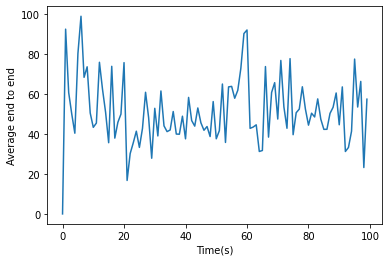

For error rate:  6e-05  and bandwidth:  1.5
Packet average delay is:  0.014144670753488395  second


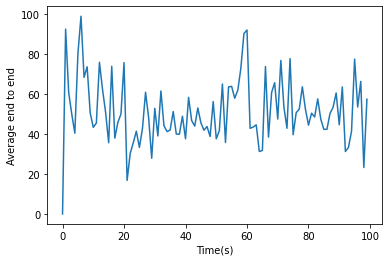

For error rate:  7.000000000000001e-05  and bandwidth:  1.5
Packet average delay is:  0.014146244367650366  second


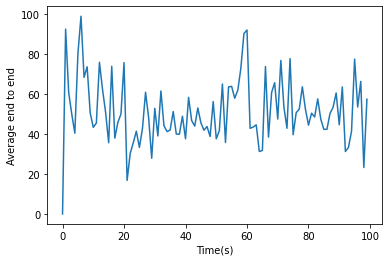

For error rate:  8e-05  and bandwidth:  1.5
Packet average delay is:  0.014146244367650366  second


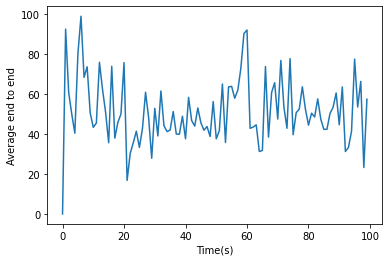

For error rate:  9e-05  and bandwidth:  1.5
Packet average delay is:  0.014146244367650366  second


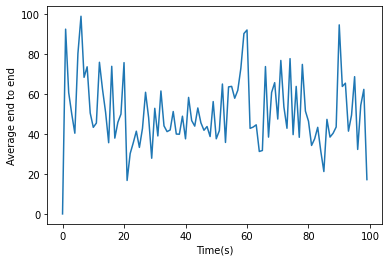

For error rate:  0.0001  and bandwidth:  1.5
Packet average delay is:  0.01401881947031971  second


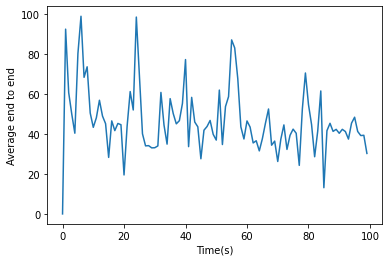

For error rate:  1e-05  and bandwidth:  1.5
Packet average delay is:  0.013165785806321592  second


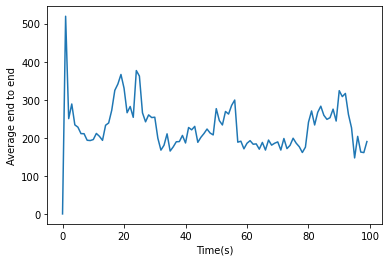

For error rate:  1e-05  and bandwidth:  55
Packet average delay is:  0.01741642659281329  second


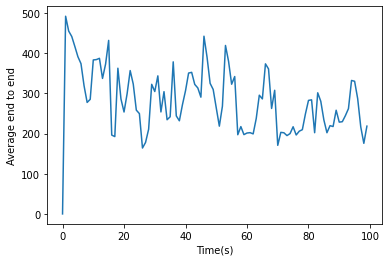

For error rate:  1e-05  and bandwidth:  155
Packet average delay is:  0.017409942745875682  second


In [113]:
calculate_average_end(files)


<h1 style = "color: orange" > Topology network nodes:  </h1>


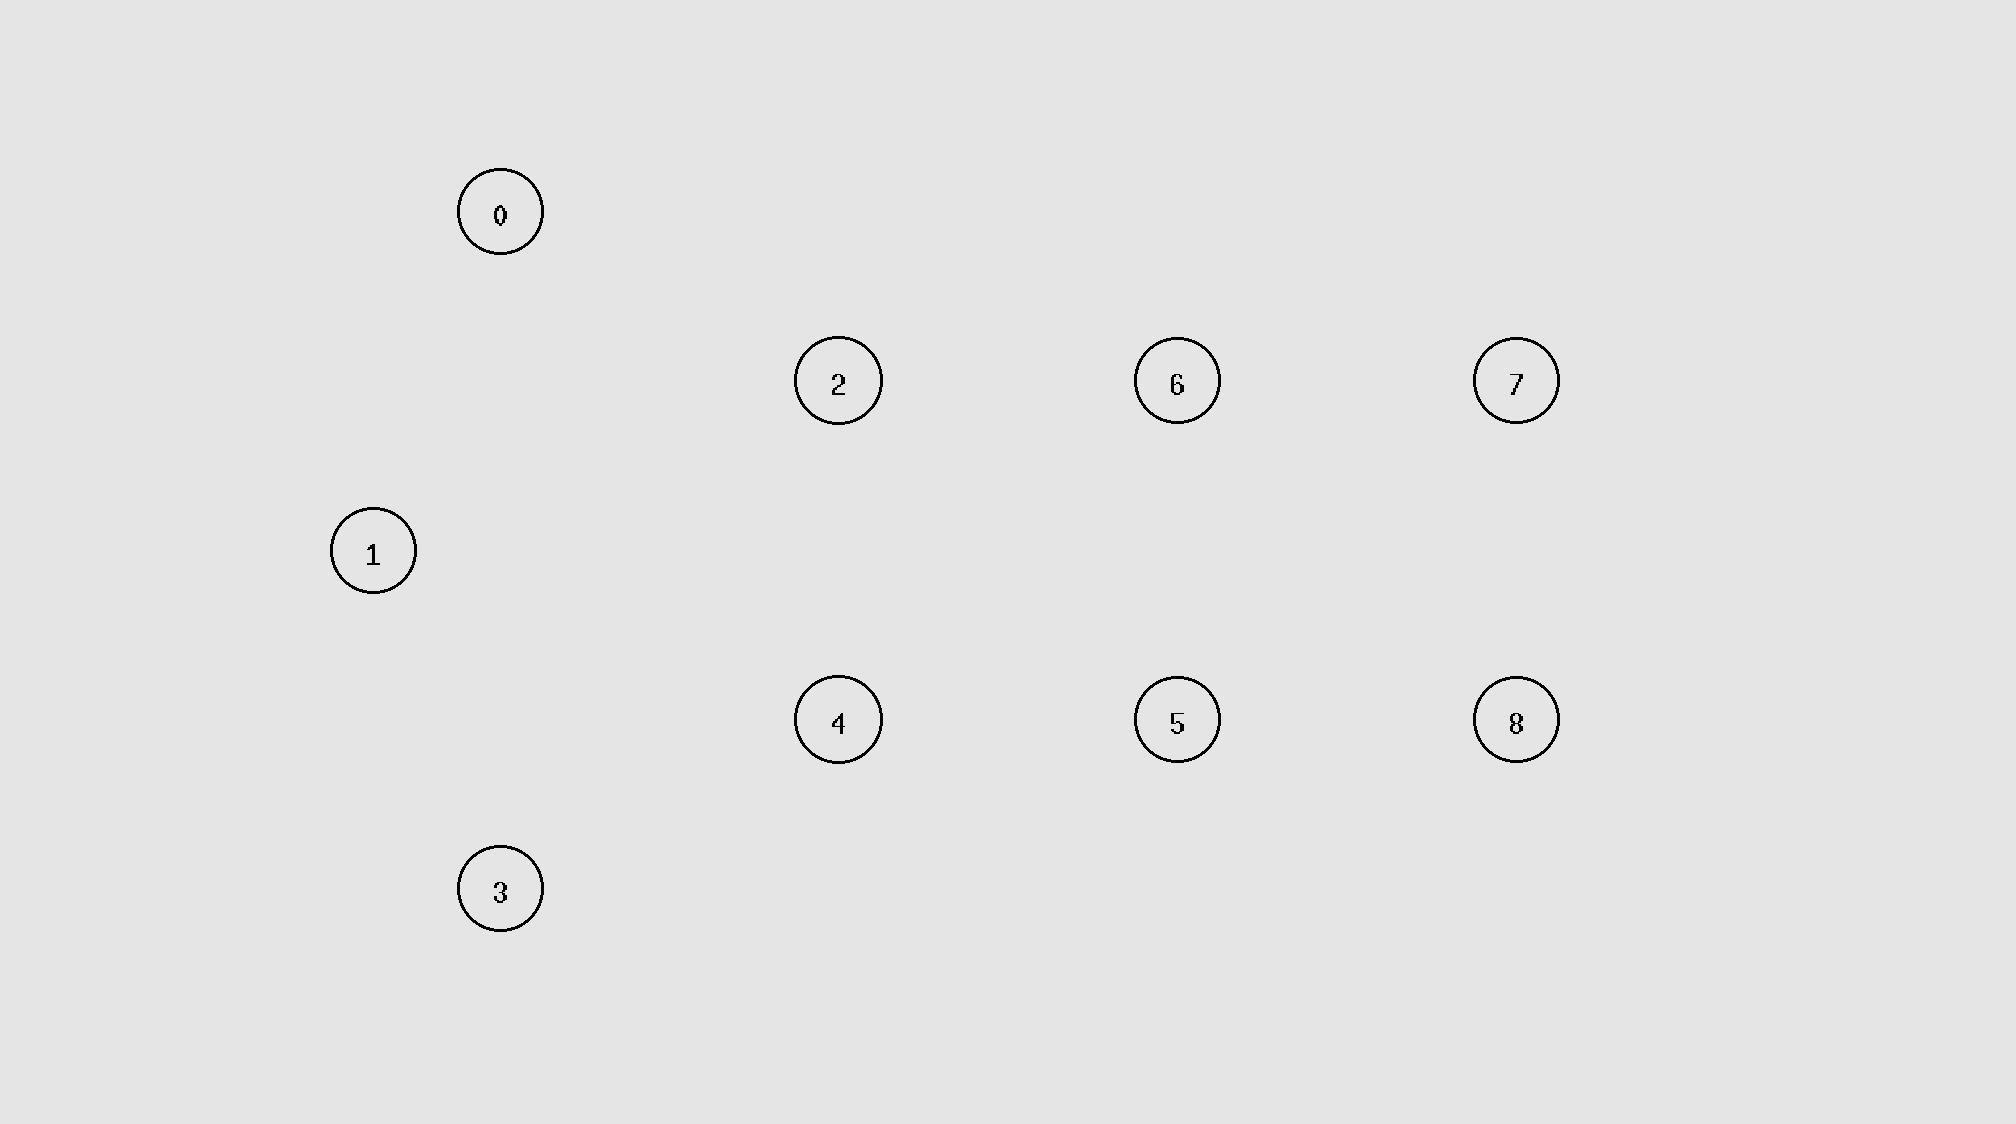

<h2 style = "color: orange"> The nodes that are connected are: </h2>
   
    0 1
    
    0 2
    
    3 1
    
    3 4
    
    2 6
    
    2 4
    
    4 5
    
    6 5
    
    6 7
    
    5 8
    
    7 8
    
    
    Other variables are the default mac802 values. 
    
   

In [114]:
files = []
simulate_all(files, 0.1)

Simulation with: 
Error Rate : 0.1
Bandwidth : 1.5
Packet Size : 1000


INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
Simulation with: 
Error Rate : 0.2
Bandwidth : 1.5
Packet Size : 1000


INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
Simulation with: 
Error Rate : 0.30000000000000004
Bandwidth : 1.5
Packet Size : 1000
Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
Simulation with: 
Error Rate : 0.4
Bandwidth : 1.5
Packet Size : 1000


INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!
INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!
INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!
INITIALIZE THE LIST xListHead


Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
Simulation with: 
Error Rate : 0.5
Bandwidth : 1.5
Packet Size : 1000
Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
Simulation with: 
Error Rate : 0.6
Bandwidth : 1.5
Packet Size : 1000


SORTING LISTS ...DONE!
INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!
INITIALIZE THE LIST xListHead


Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
Simulation with: 
Error Rate : 0.7
Bandwidth : 1.5
Packet Size : 1000
Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
Simulation with: 
Error Rate : 0.7999999999999999
Bandwidth : 1.5
Packet Size : 1000


SORTING LISTS ...DONE!
INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!
INITIALIZE THE LIST xListHead


Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
Simulation with: 
Error Rate : 0.8999999999999999
Bandwidth : 1.5
Packet Size : 1000
Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
Simulation with: 
Error Rate : 0.9999999999999999
Bandwidth : 1.5
Packet Size : 1000


SORTING LISTS ...DONE!
INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
Simulation with: 
Error Rate : 1e-05
Bandwidth : 1.5
Packet Size : 1000
Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
Simulation with: 
Error Rate : 1e-05
Bandwidth : 55
Packet Size : 1000


INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
Simulation with: 
Error Rate : 1e-05
Bandwidth : 155
Packet Size : 1000


INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0


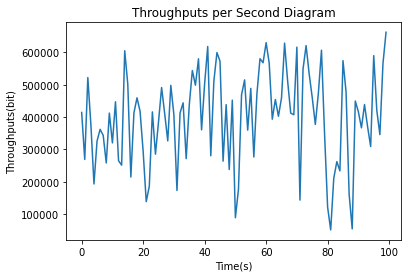

For error rate:  0.1  and bandwidth:  1.5
Throughput is:  0.3821441650390625


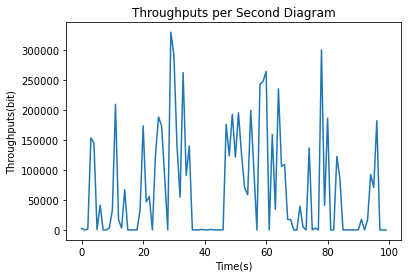

For error rate:  0.2  and bandwidth:  1.5
Throughput is:  0.0666070556640625


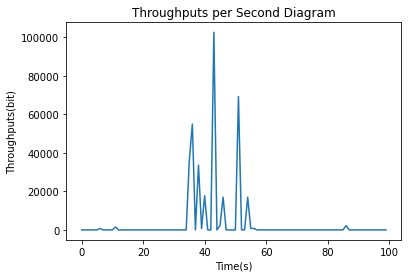

For error rate:  0.30000000000000004  and bandwidth:  1.5
Throughput is:  0.003399658203125


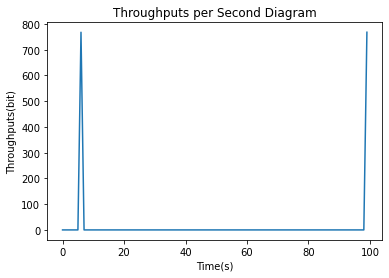

For error rate:  0.4  and bandwidth:  1.5
Throughput is:  1.46484375e-05


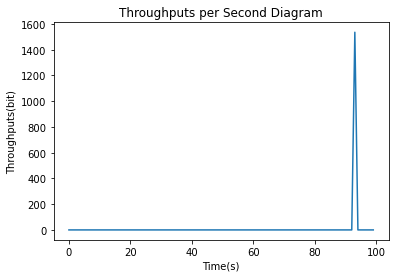

For error rate:  0.5  and bandwidth:  1.5
Throughput is:  1.46484375e-05


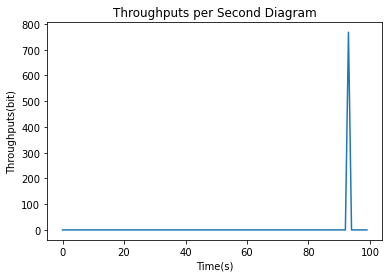

For error rate:  0.6  and bandwidth:  1.5
Throughput is:  7.32421875e-06


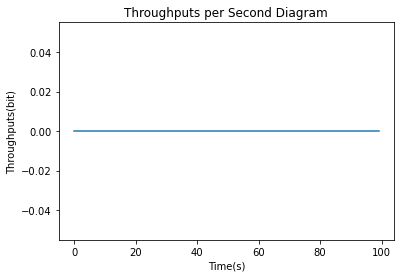

For error rate:  0.7  and bandwidth:  1.5
Throughput is:  0.0


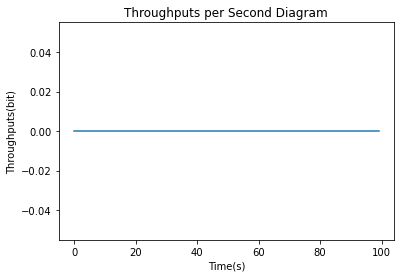

For error rate:  0.7999999999999999  and bandwidth:  1.5
Throughput is:  0.0


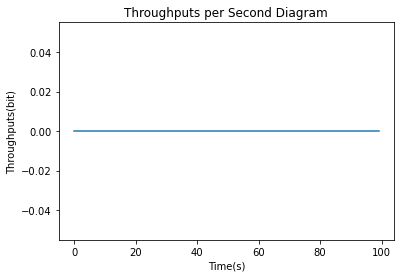

For error rate:  0.8999999999999999  and bandwidth:  1.5
Throughput is:  0.0


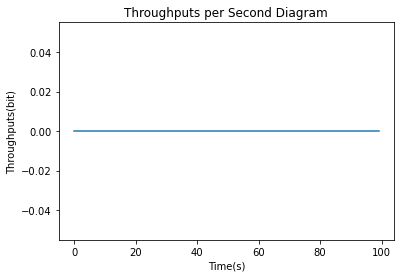

For error rate:  0.9999999999999999  and bandwidth:  1.5
Throughput is:  0.0


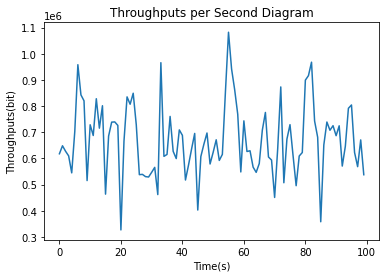

For error rate:  1e-05  and bandwidth:  1.5
Throughput is:  0.639278564453125


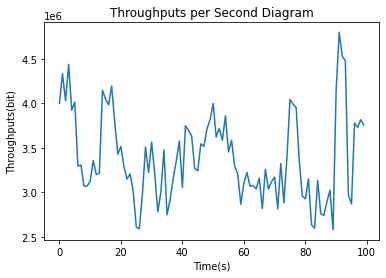

For error rate:  1e-05  and bandwidth:  55
Throughput is:  3.236051025390625


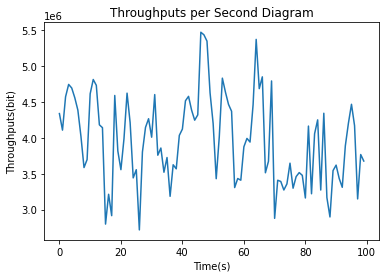

For error rate:  1e-05  and bandwidth:  155
Throughput is:  3.7802777099609375


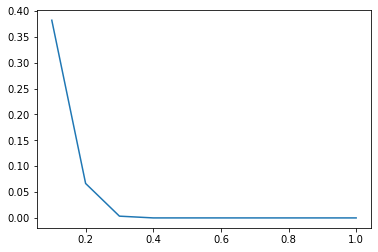

In [115]:
calculate_throughputs(files, 0.1)

As we can see by increasing error rate mostly throughput decreases and in the 1 error rate the throughput become 0. In low error rate value the calculated value is mostly random.

In [116]:
calculate_packet_transfer_ratio(files)

For error rate:  0.1  and bandwidth:  1.5
Packet transfer ratio is:  0.8720897217490062
For error rate:  0.2  and bandwidth:  1.5
Packet transfer ratio is:  0.6767537826685007
For error rate:  0.30000000000000004  and bandwidth:  1.5
Packet transfer ratio is:  0.3621621621621622
For error rate:  0.4  and bandwidth:  1.5
Packet transfer ratio is:  0.03571428571428571
For error rate:  0.5  and bandwidth:  1.5
Packet transfer ratio is:  0.038461538461538464
For error rate:  0.6  and bandwidth:  1.5
Packet transfer ratio is:  0.018867924528301886
For error rate:  0.7  and bandwidth:  1.5
Packet transfer ratio is:  0.0
For error rate:  0.7999999999999999  and bandwidth:  1.5
Packet transfer ratio is:  0.0
For error rate:  0.8999999999999999  and bandwidth:  1.5
Packet transfer ratio is:  0.0
For error rate:  0.9999999999999999  and bandwidth:  1.5
Packet transfer ratio is:  0.0
For error rate:  1e-05  and bandwidth:  1.5
Packet transfer ratio is:  0.888731521642914
For error rate:  1e-05  a

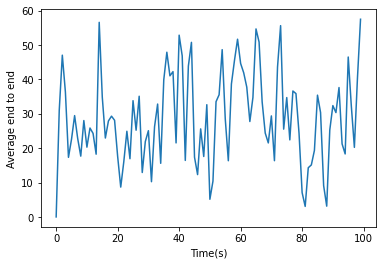

For error rate:  0.1  and bandwidth:  1.5
Packet average delay is:  0.014722422455325575  second


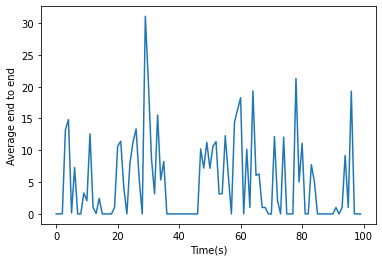

For error rate:  0.2  and bandwidth:  1.5
Packet average delay is:  0.011671360176701614  second


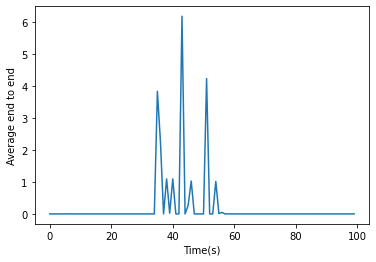

For error rate:  0.30000000000000004  and bandwidth:  1.5
Packet average delay is:  0.008400405762841123  second


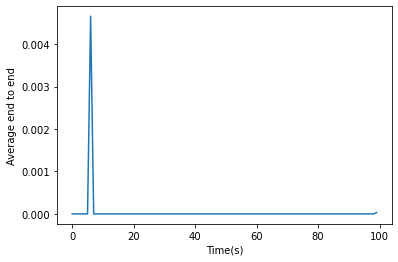

For error rate:  0.4  and bandwidth:  1.5
Packet average delay is:  7.734040500000816e-06  second


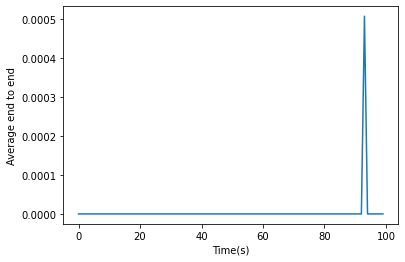

For error rate:  0.5  and bandwidth:  1.5
Packet average delay is:  1.1796599500005555e-05  second


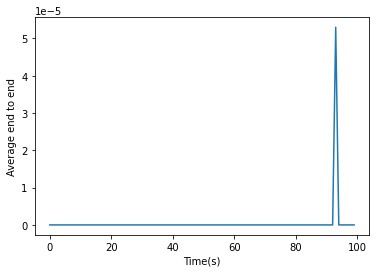

For error rate:  0.6  and bandwidth:  1.5
Packet average delay is:  2.46454199999846e-06  second


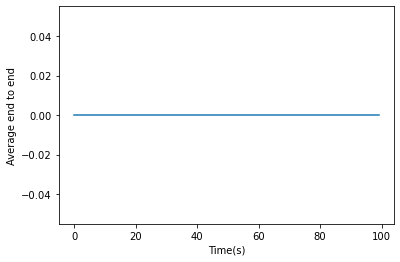

For error rate:  0.7  and bandwidth:  1.5
Packet average delay is:  0  second


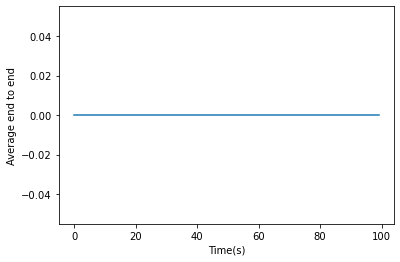

For error rate:  0.7999999999999999  and bandwidth:  1.5
Packet average delay is:  0  second


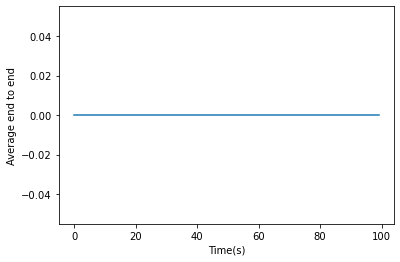

For error rate:  0.8999999999999999  and bandwidth:  1.5
Packet average delay is:  0  second


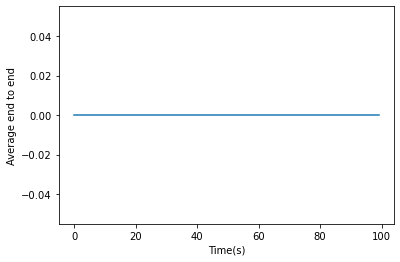

For error rate:  0.9999999999999999  and bandwidth:  1.5
Packet average delay is:  0  second


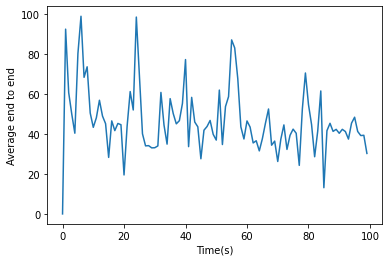

For error rate:  1e-05  and bandwidth:  1.5
Packet average delay is:  0.013165785806321592  second


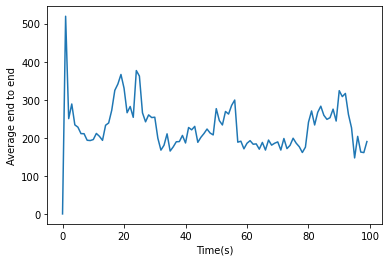

For error rate:  1e-05  and bandwidth:  55
Packet average delay is:  0.01741642659281329  second


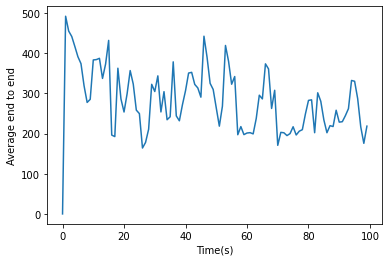

For error rate:  1e-05  and bandwidth:  155
Packet average delay is:  0.017409942745875682  second


In [117]:
calculate_average_end(files)

In [134]:
files = []
for size_packet in range(1000, 10000, 1000): 
    file_name = "packet" + str(size_packet)
    command_string = "ns " + NAME_TCL_FILE + " " + str(ERROR_RATE_DEFAULT) + " " + str(BAND_WIDTH_DEFAULT) + " " + file_name + " " + str(size_packet)
    files.append(file_name)
    os.system(command_string)
    


Simulation with: 
Error Rate : 1e-05
Bandwidth : 1.5
Packet Size : 1000


INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
Simulation with: 
Error Rate : 1e-05
Bandwidth : 1.5
Packet Size : 2000


INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
Simulation with: 
Error Rate : 1e-05
Bandwidth : 1.5
Packet Size : 3000


INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
Simulation with: 
Error Rate : 1e-05
Bandwidth : 1.5
Packet Size : 4000


INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
Simulation with: 
Error Rate : 1e-05
Bandwidth : 1.5
Packet Size : 5000


INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
Simulation with: 
Error Rate : 1e-05
Bandwidth : 1.5
Packet Size : 6000


INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
Simulation with: 
Error Rate : 1e-05
Bandwidth : 1.5
Packet Size : 7000


INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
Simulation with: 
Error Rate : 1e-05
Bandwidth : 1.5
Packet Size : 8000


INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
Simulation with: 
Error Rate : 1e-05
Bandwidth : 1.5
Packet Size : 9000


INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


Simulation Finished
####################
num_nodes is set 10
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0


[('packet1000', 1e-05, 1.5), ('packet2000', 1e-05, 1.5), ('packet3000', 1e-05, 1.5), ('packet4000', 1e-05, 1.5), ('packet5000', 1e-05, 1.5), ('packet6000', 1e-05, 1.5), ('packet7000', 1e-05, 1.5), ('packet8000', 1e-05, 1.5), ('packet9000', 1e-05, 1.5)]


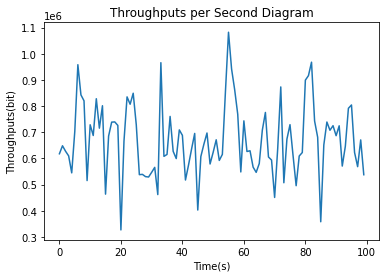

For error rate:  1e-05  and bandwidth:  1.5
Throughput is:  0.639278564453125


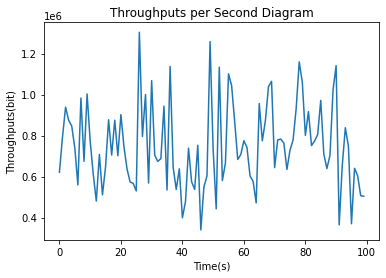

For error rate:  1e-05  and bandwidth:  1.5
Throughput is:  0.71447021484375


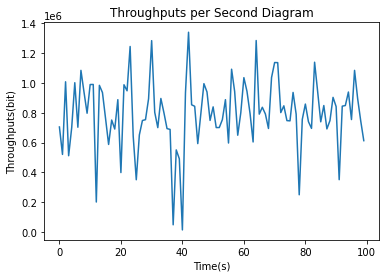

For error rate:  1e-05  and bandwidth:  1.5
Throughput is:  0.75830322265625


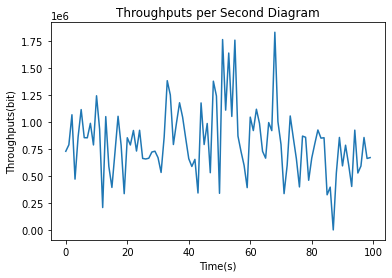

For error rate:  1e-05  and bandwidth:  1.5
Throughput is:  0.77596923828125


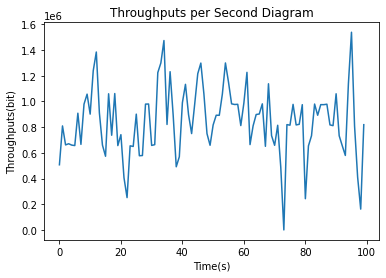

For error rate:  1e-05  and bandwidth:  1.5
Throughput is:  0.806322021484375


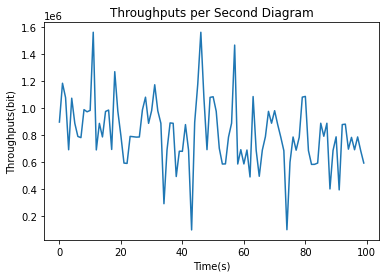

For error rate:  1e-05  and bandwidth:  1.5
Throughput is:  0.7756817626953125


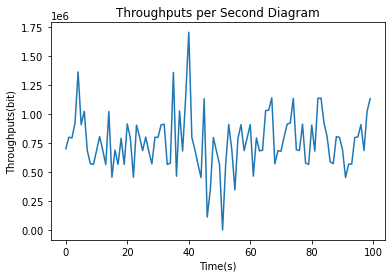

For error rate:  1e-05  and bandwidth:  1.5
Throughput is:  0.72861083984375


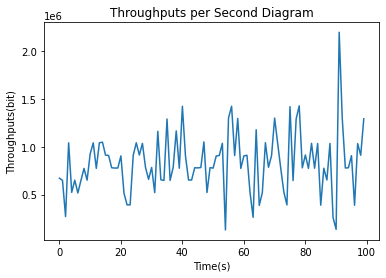

For error rate:  1e-05  and bandwidth:  1.5
Throughput is:  0.7967352294921874


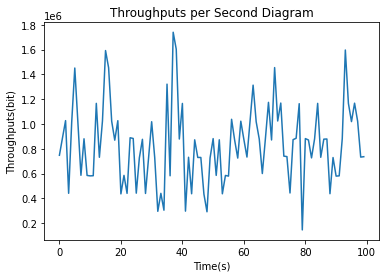

For error rate:  1e-05  and bandwidth:  1.5
Throughput is:  0.79877197265625


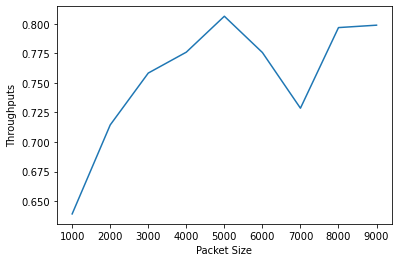

In [135]:
files = [(x, ERROR_RATE_DEFAULT, BAND_WIDTH_DEFAULT) for x in files]
print(files)
calculate_throughputs(files, -1)

As we could observe in the diagram by changing packet size throughput changes and mostly it is increasing till it reach a peack which in this diagram this value is approximetely 5000 which could be the best packet size.